# Porównanie metod adaptacji $\sigma$ - bez CMA

In [31]:
library(tidyverse)
library(magrittr)
library(furrr)
library(tictoc)
source("../src/cma-es/cma-es.R") # CSA-rule (Ostermeier)
source("../src/cma-es/cma-es-no-sigma.R") # Raw ES
source("../src/cma-es/cma-es-sigma-quant.R") # Quant-rule (Arabas & Warchulski)
source("../src/cma-es/cma-es-sigma-JA.R") # Quant-rule (Arabas & Warchulski)
source("../src/cma-es/cma-es-onefifth-sigma.R") # 1/5th rule
source("../src/cma-es/cma-es-onefifth-exp-sigma.R") # 1/5h rule exp (Hansen)
source("../src/cma-es/cma-es-msr-sigma.R") # MSR i.e median success rule (Hansen & Auger)
source("../src/cma-es/cma-es-psr-sigma.R") # PSR i.e population success rule (Loshchilov)
source("../src/eval-funcs.R")
source("../src/exp-utils.R")
source("../src/data-utils.R")
source("../src/plot-funcs.R")
source("../src/quantile-utils.R")
options(repr.plot.width=10, repr.plot.height=10)


## Eksperyment

* `cma_es_no_sigma()`: CMA-ES ze stałą $\sigma$ i macierzą kowariancji $I_N$
* `cma_es()`: CMA-ES z adaptacją $\sigma$ wg CSA i macierzą kowariancji $I_N$
* `cma_es_no_sigma_quant()`: CMA-ES z "kwantylową" adaptacją $\sigma$ i macierzą kowariancji $I_N$
* `cma_es_no_sigma_msr()`: CMA-ES z medianową regułą adaptacji $\sigma$ i macierzą kowariancji $I_N$
* `cma_es_no_sigma_psr()`: CMA-ES z populacyjną regułą adaptacji $\sigma$ i macierzą kowariancji $I_N$
* `cma_es_no_sigma_expth()`: CMA-ES z 1/5th+exp regułą adaptacji $\sigma$ i macierzą kowariancji $I_N$


1. $\lambda$ =  $4N$
2. maxit = 1000
3. $x \in [-1000, 1000]^{10}$



In [3]:
methods = list(
    cma_es_no_sigma,
    cma_es,
    cma_es_sigma_onefifth,
    cma_es_sigma_JA,
    cma_es_sigma_msr,
    cma_es_sigma_psr,
    cma_es_sigma_expth,
    cma_es_sigma_quant)

lower = -100
upper = 100 
x0 = 100
CMA_flag = FALSE

In [4]:
gutter_eval10 = 
  do_experiment(
                methods,
                gutter_func,
                10,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

Loading required package: sp



In [5]:
sphere_eval10 = 
  do_experiment(
                methods,
                sphere_func,
                10,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

In [6]:
linear_eval10 = 
  do_experiment(
                methods,
                linear_func,
                10,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

In [7]:
gutter_eval50 = 
  do_experiment(
                methods,
                gutter_func,
                50,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

In [8]:
sphere_eval50 = 
  do_experiment(
                methods,
                sphere_func,
                50,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

In [9]:
linear_eval50 = 
  do_experiment(
                methods,
                linear_func,
                50,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

In [10]:
gutter_eval100 = 
  do_experiment(
                methods,
                gutter_func,
                100,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

In [11]:
sphere_eval100 = 
  do_experiment(
                methods,
                sphere_func,
                100,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

In [12]:
linear_eval100 = 
  do_experiment(
                methods,
                linear_func,
                100,
                x0,
                lower = lower,
                upper = upper,
                CMA = CMA_flag)

## Krzywe zbieżności + sigma -- 10D
### Funkcja gutter $q(x) = x_1 + \sum^{\lambda}_{i = 2}x^{2}_{i}$

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 4248 rows containing missing values (geom_point).”
Warning message:
“Removed 4248 row(s) containing missing values (geom_path).”


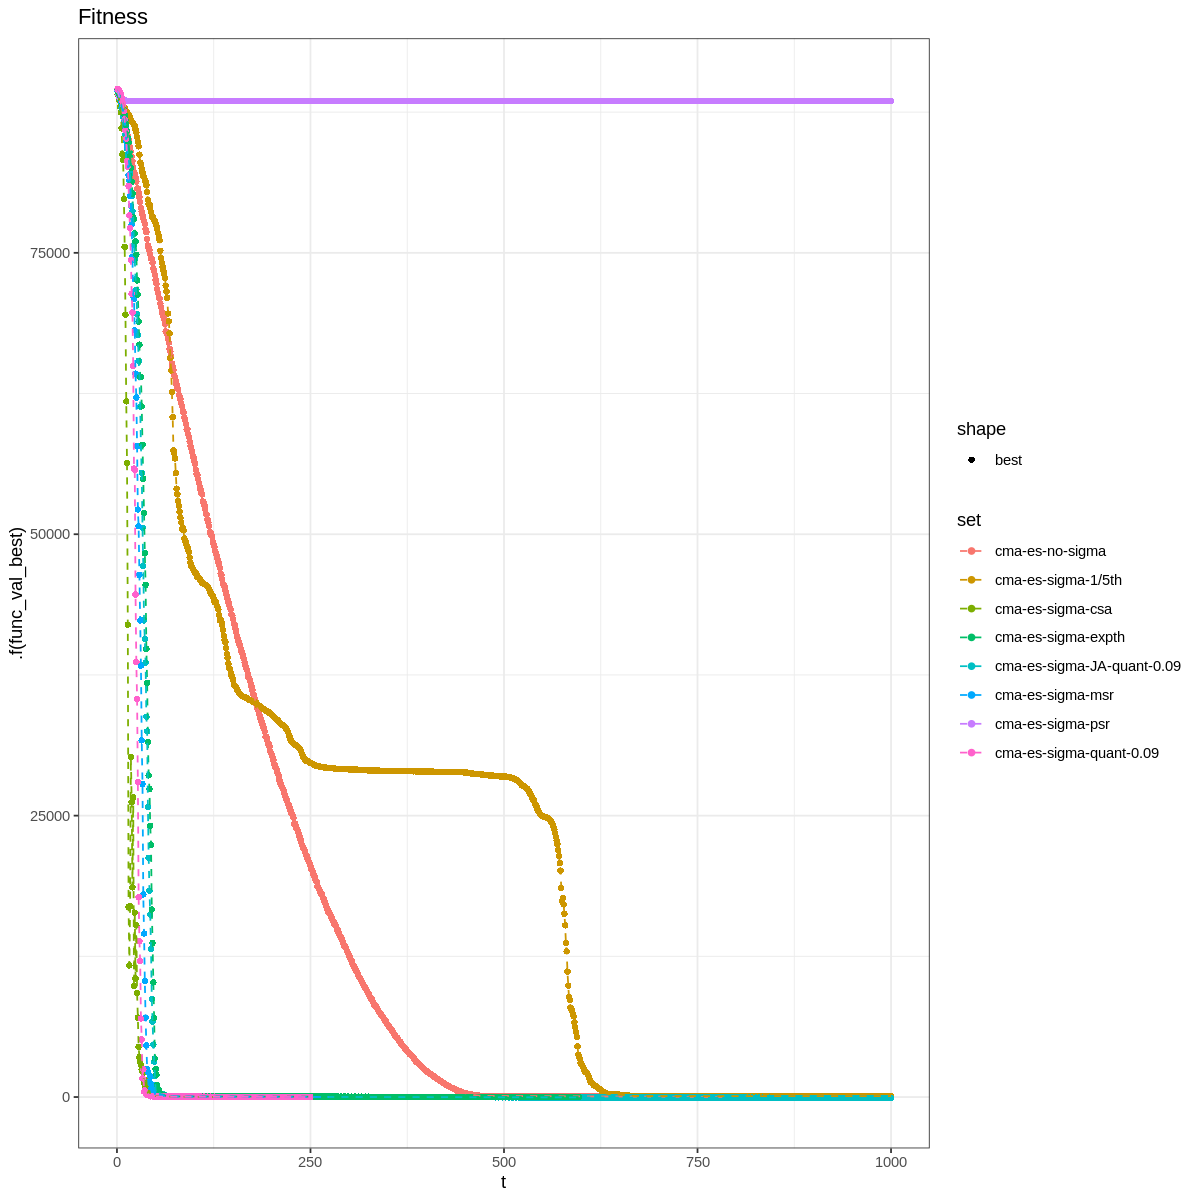

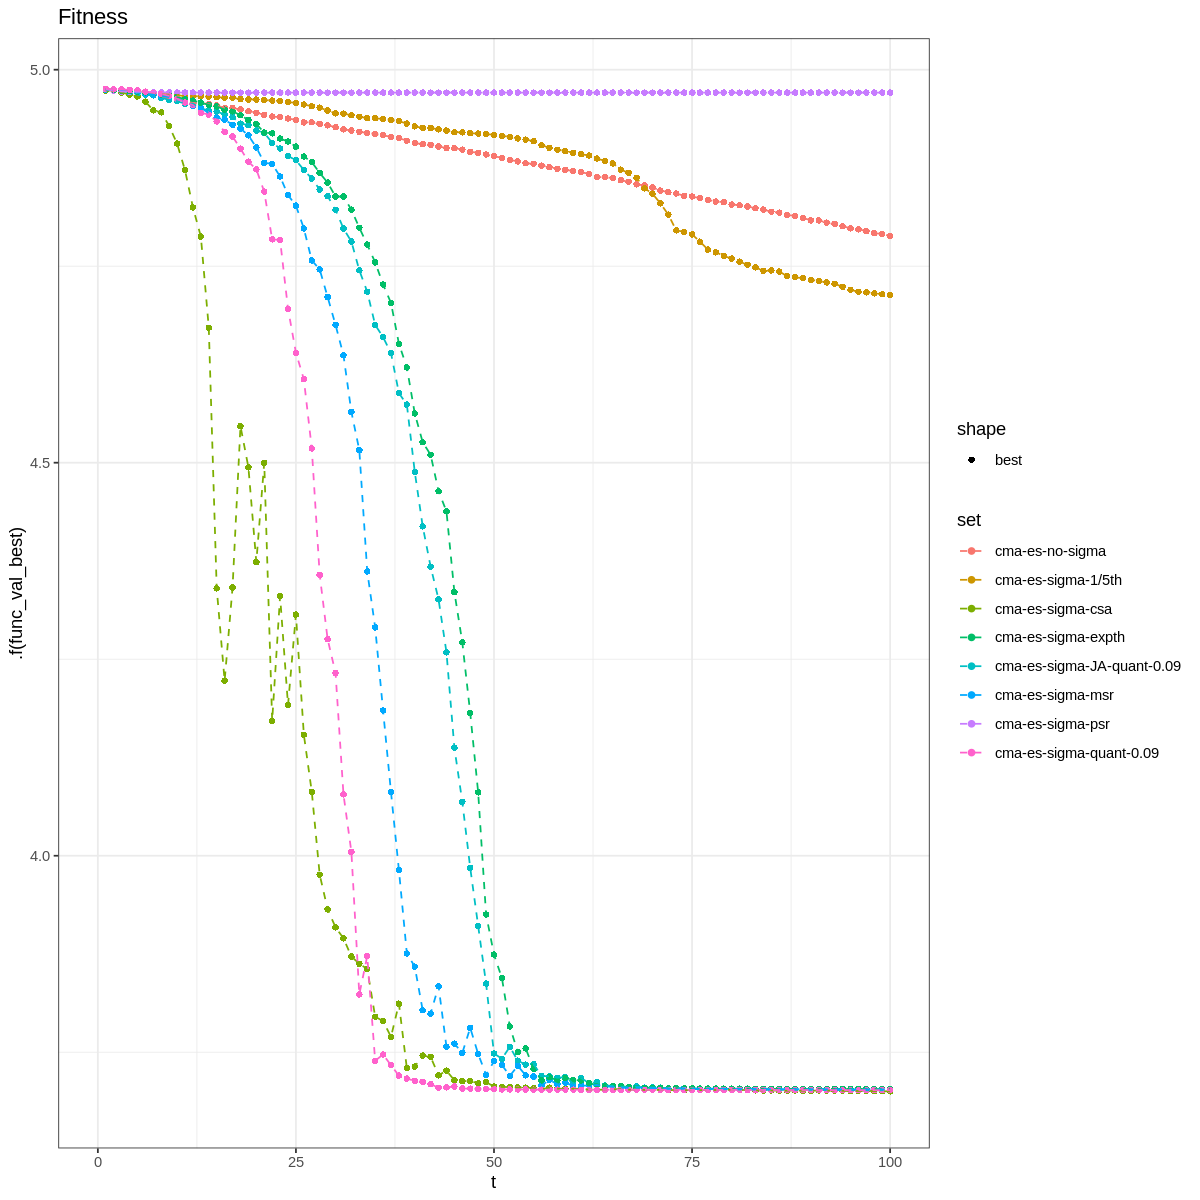

In [32]:
gutter_eval10 %>% value_plot()
gutter_eval10 %>% mutate(func_val_best = func_val_best + 5000) %>% value_plot(.f=log10) + xlim(0, 100)
#gutter_eval10 %>% sigma_plot()

### Funkcja sferyczna $q(x) = x^{T}x$

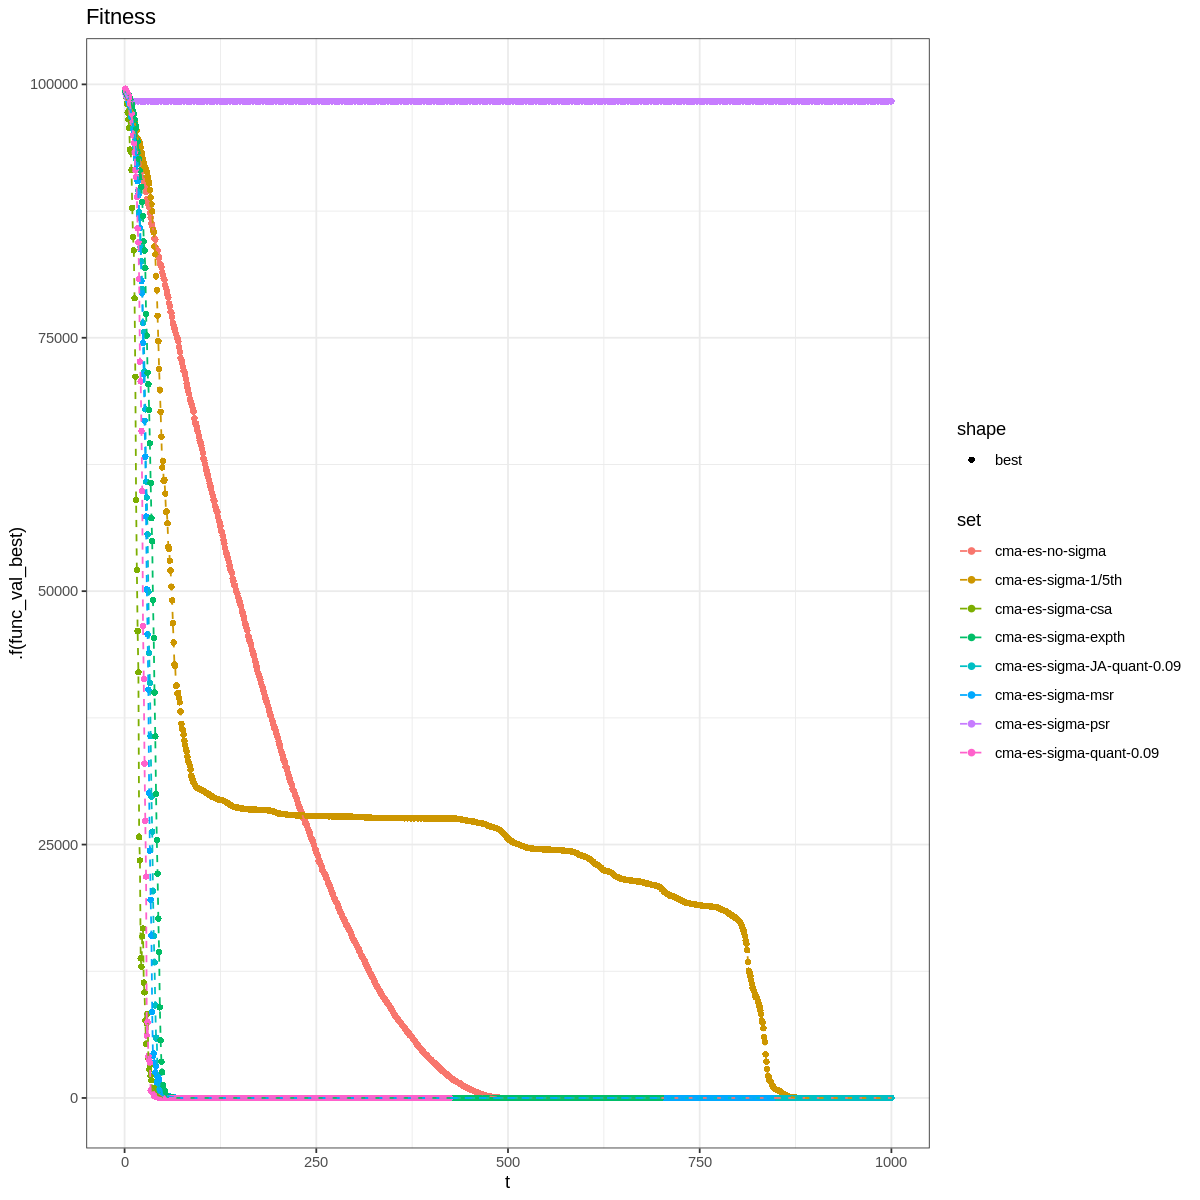

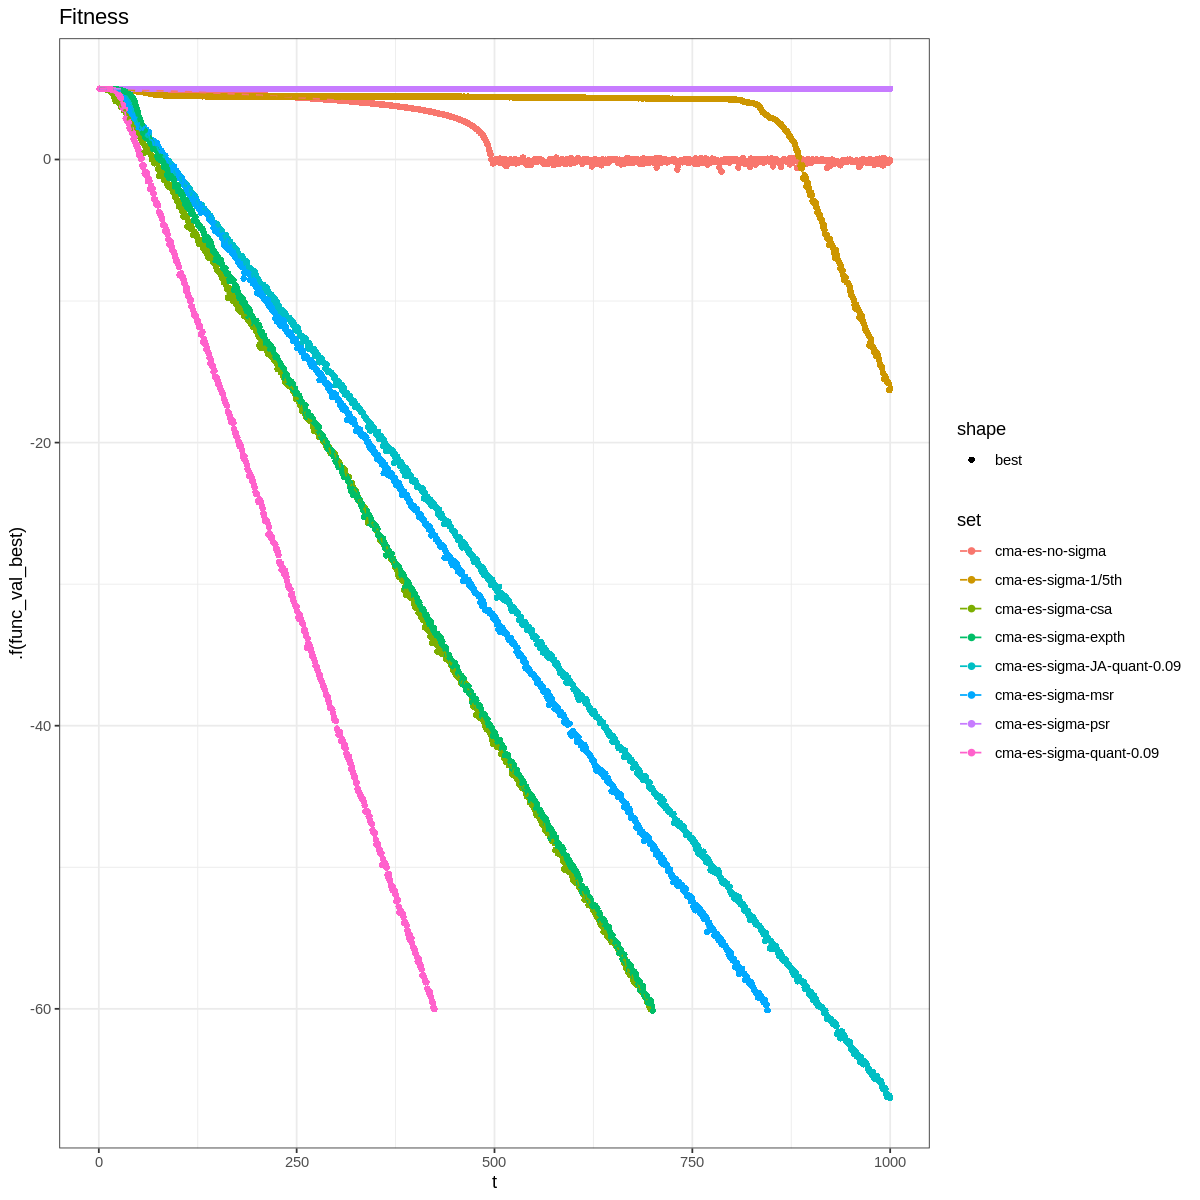

In [33]:
sphere_eval10 %>% value_plot()
sphere_eval10 %>% value_plot(.f=log10)
#sphere_eval10 %>% sigma_plot()

### Funkcja liniowa $q(x) = x_1$

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message:
“Removed 927 rows containing missing values (geom_point).”
Warning message:
“Removed 927 row(s) containing missing values (geom_path).”


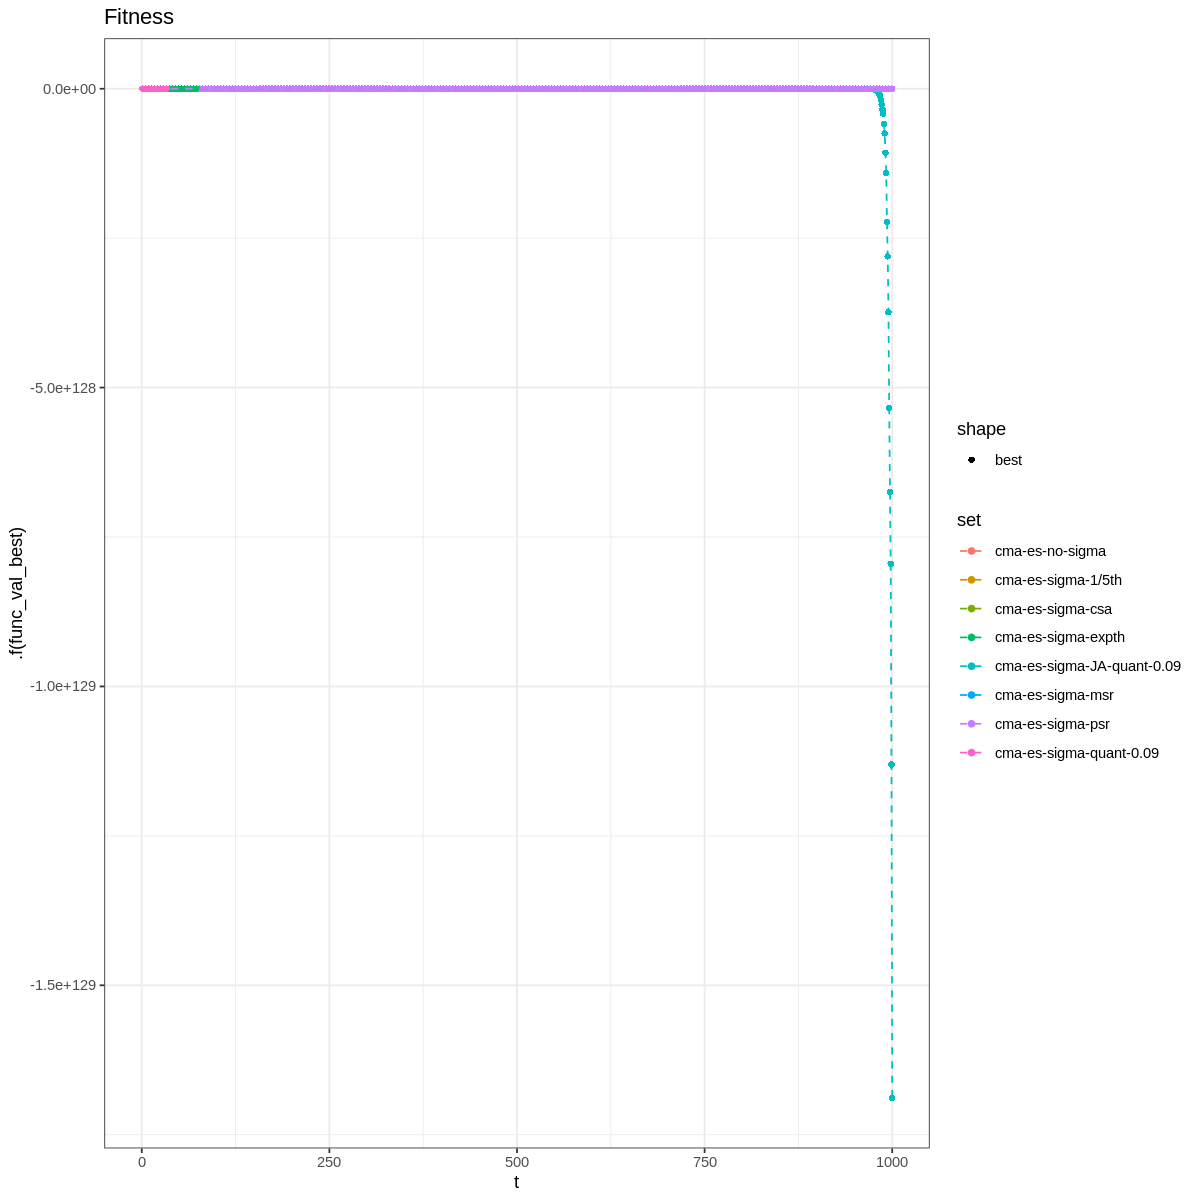

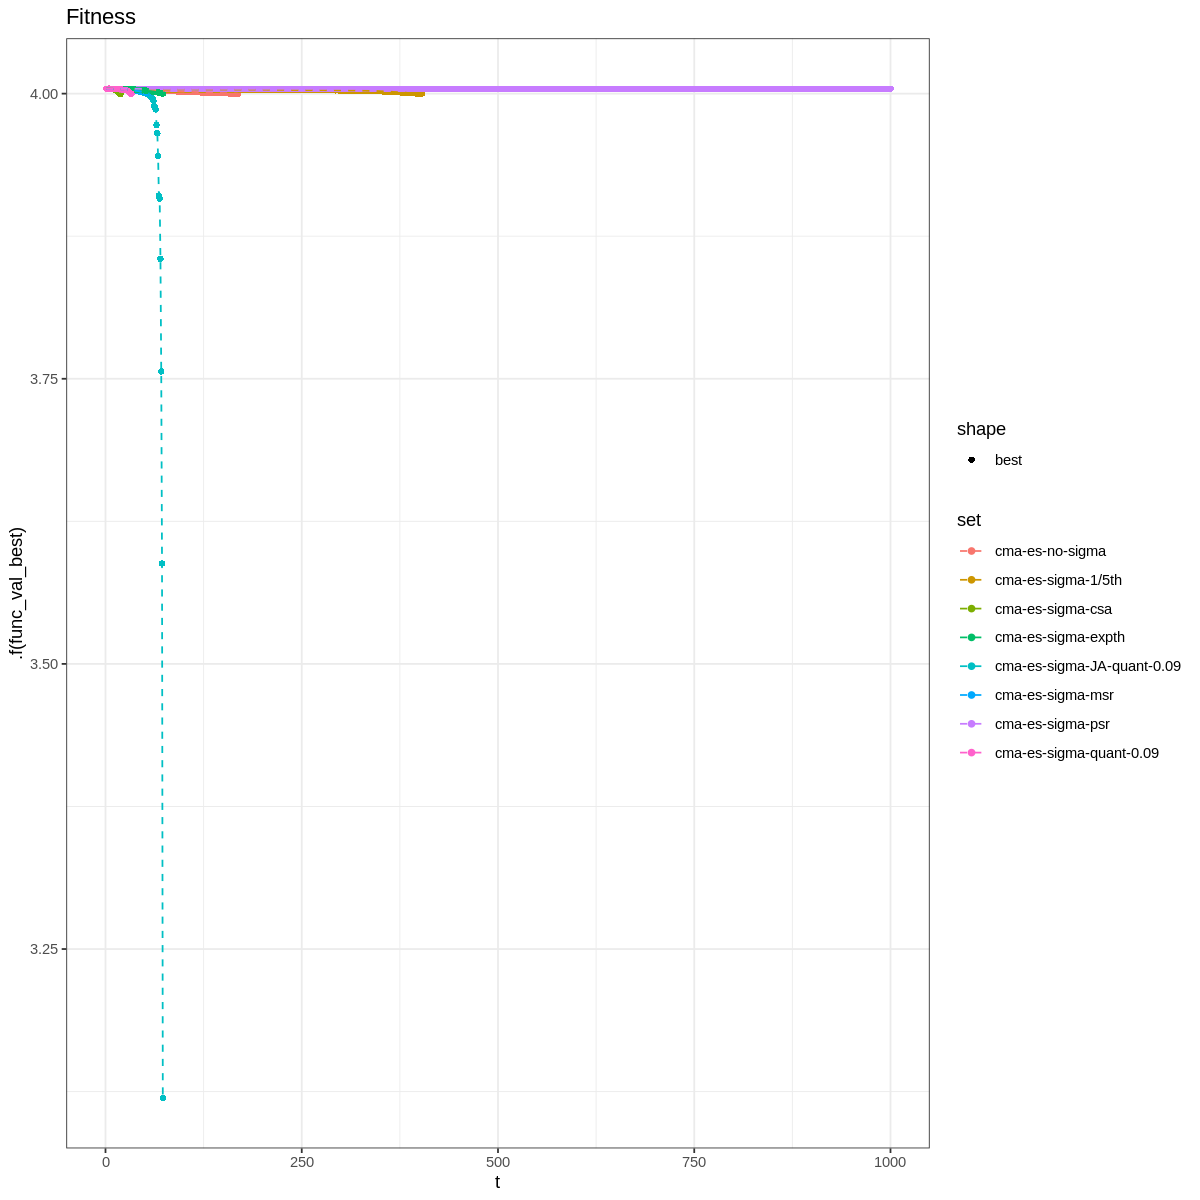

In [34]:
linear_eval10 %>% value_plot()
linear_eval10 %>% mutate(func_val_best = func_val_best + 10000) %>% value_plot(.f=log10) 
#linear_eval10 %>% sigma_plot()

## Krzywe zbieżności -- 50D
### Funkcja gutter $q(x) = x_1 + \sum^{\lambda}_{i = 2}x^{2}_{i}$

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 4738 rows containing missing values (geom_point).”
Warning message:
“Removed 4738 row(s) containing missing values (geom_path).”


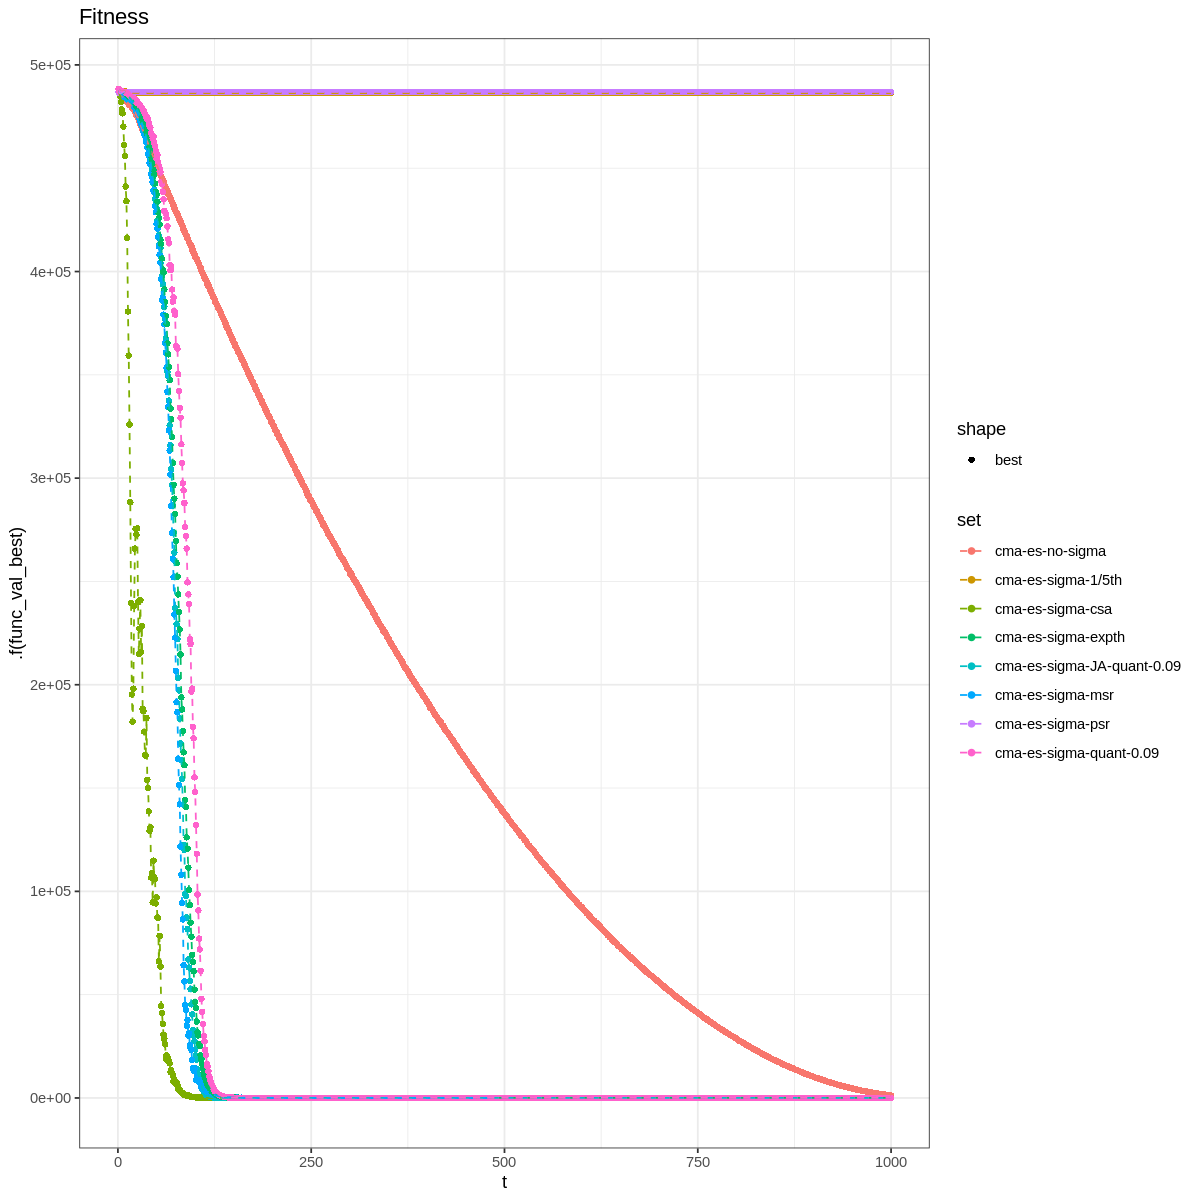

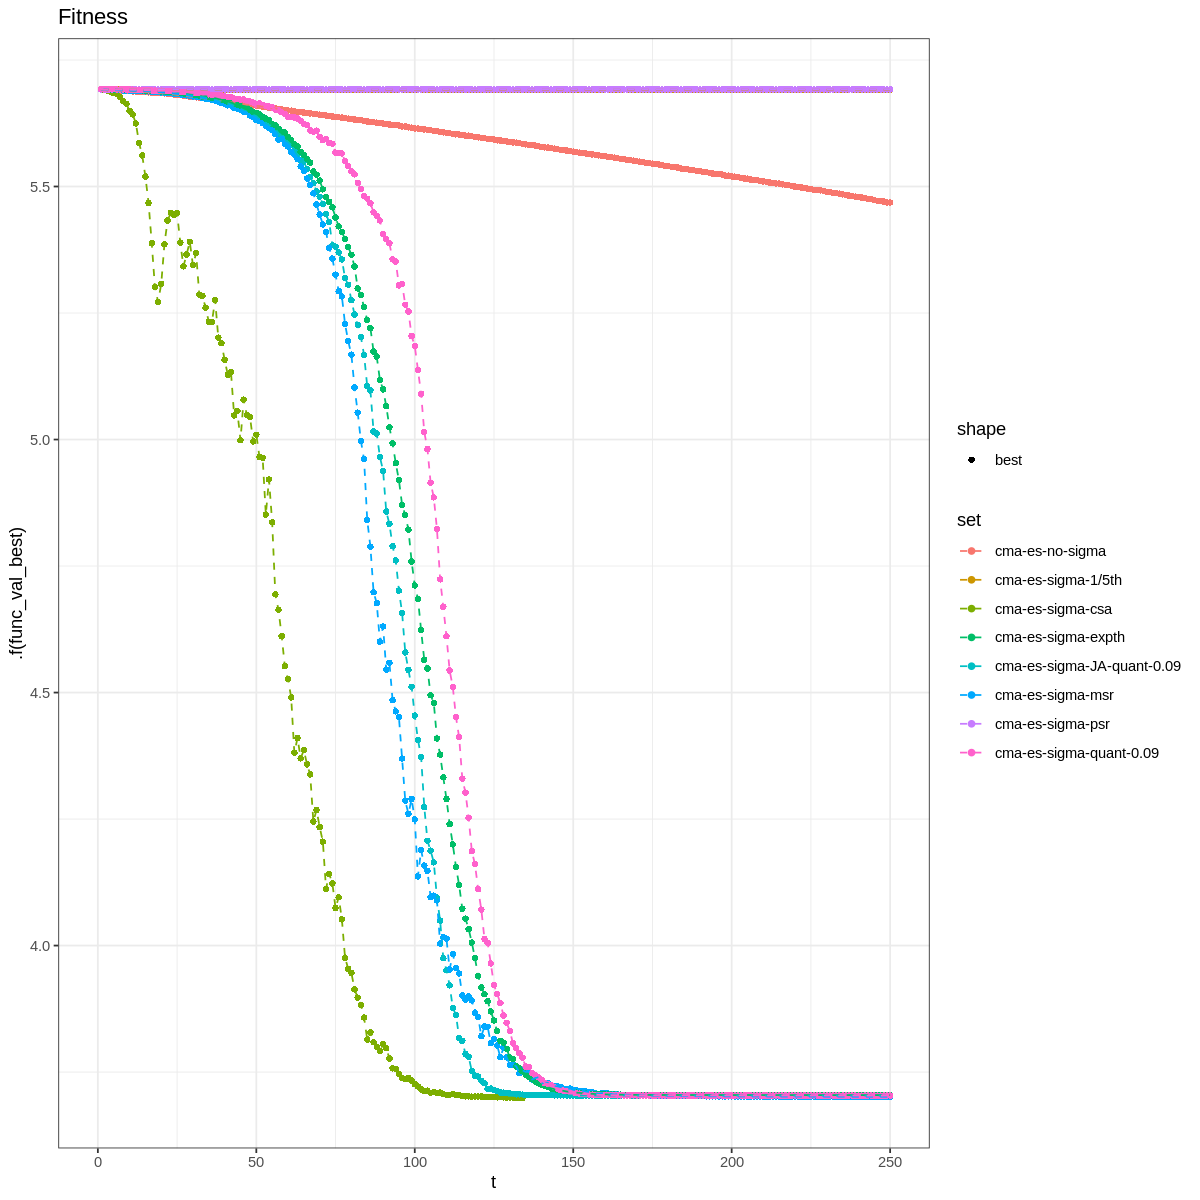

In [35]:
gutter_eval50 %>% value_plot()
gutter_eval50 %>% mutate(func_val_best = func_val_best + 5000) %>% value_plot(.f=log10) + xlim(0, 250)
#gutter_eval50 %>% sigma_plot()

### Funkcja sferyczna $q(x) = x^{T}x$

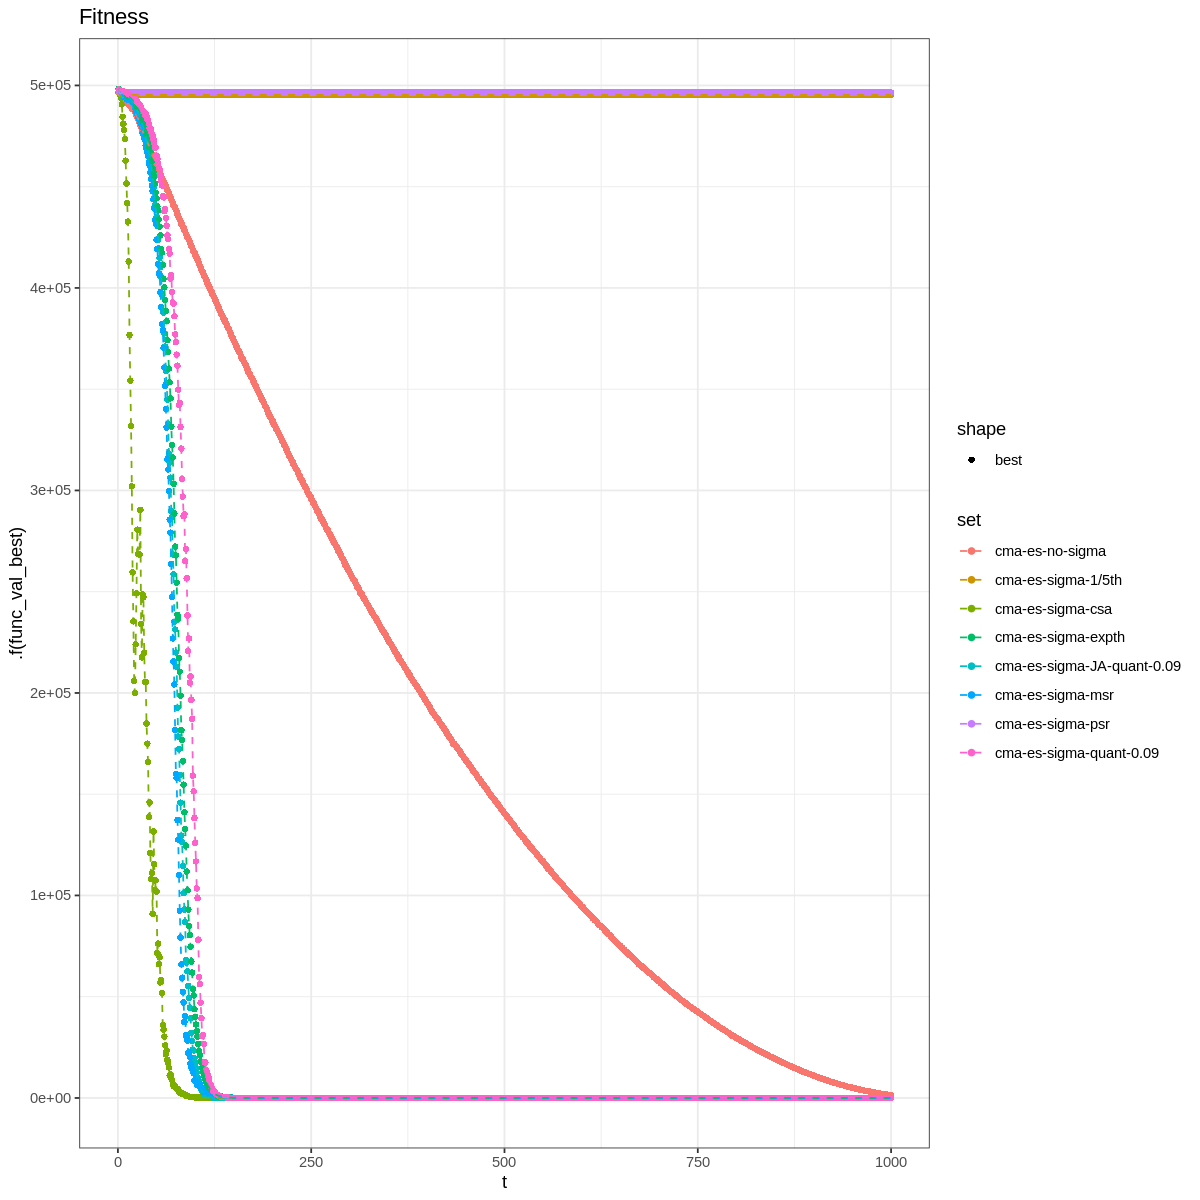

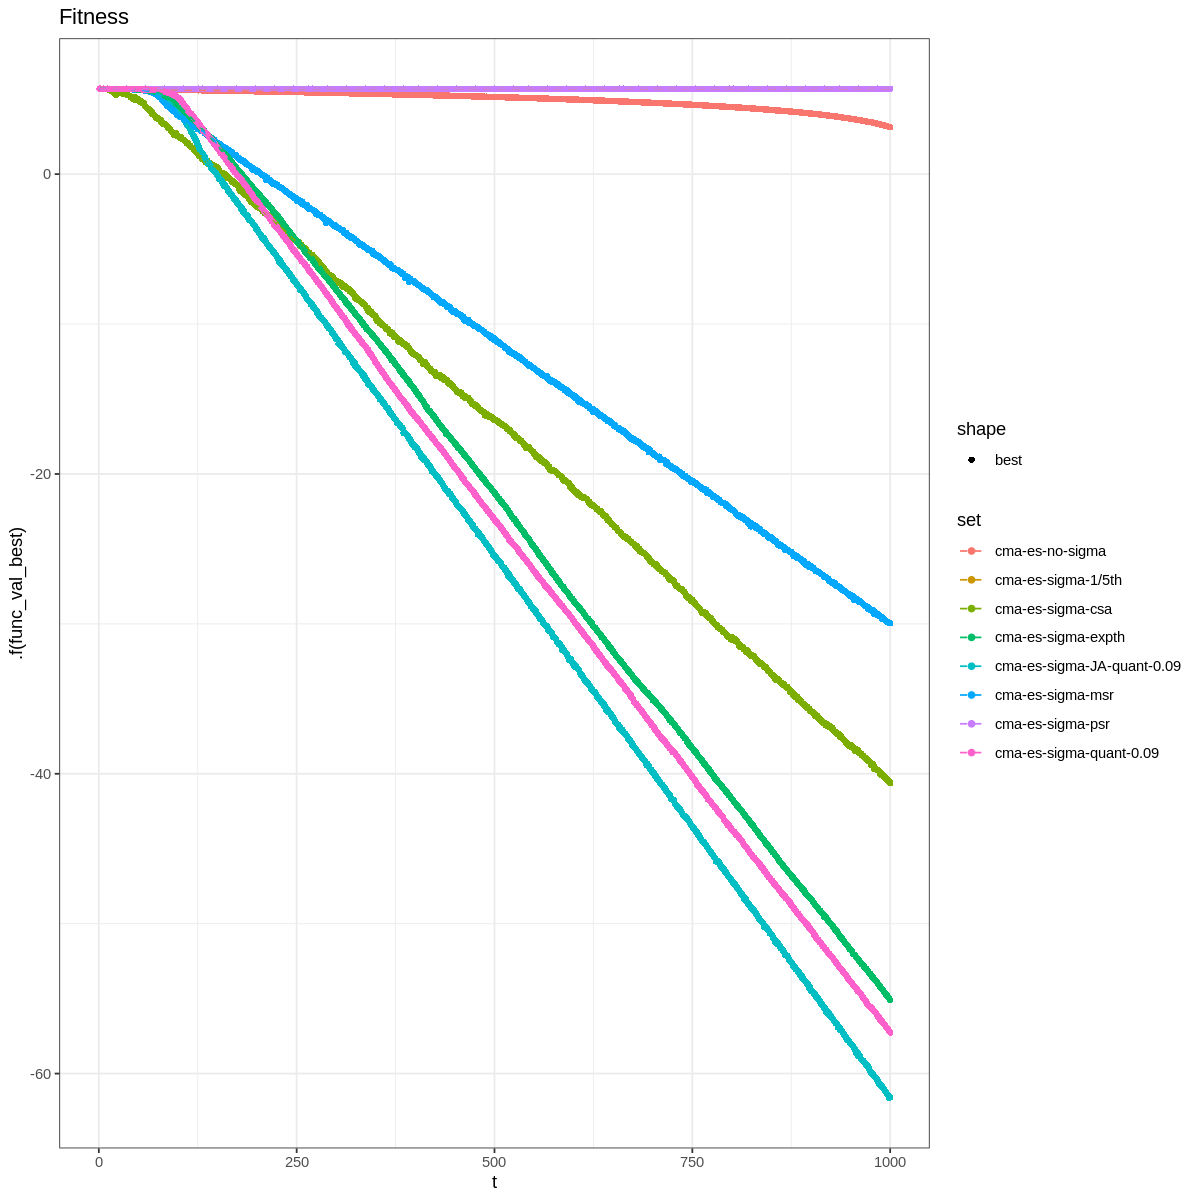

In [36]:
sphere_eval50 %>% value_plot()
sphere_eval50 %>% value_plot(.f=log10)
#sphere_eval50 %>% sigma_plot()

### Funkcja liniowa $q(x) = x_1$

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message:
“Removed 2332 rows containing missing values (geom_point).”
Warning message:
“Removed 2332 row(s) containing missing values (geom_path).”


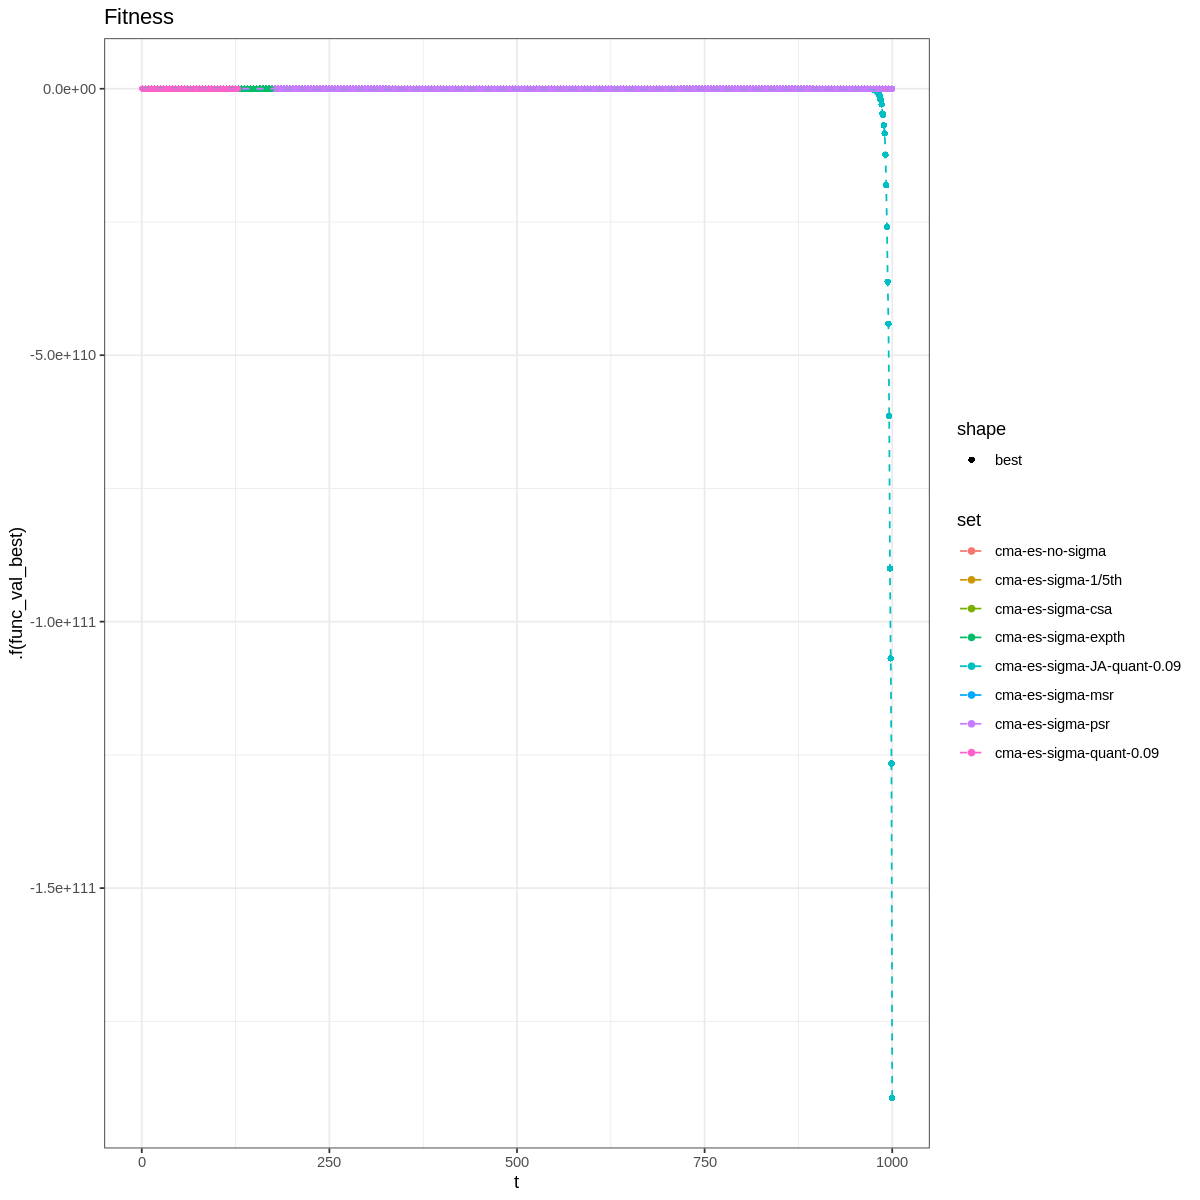

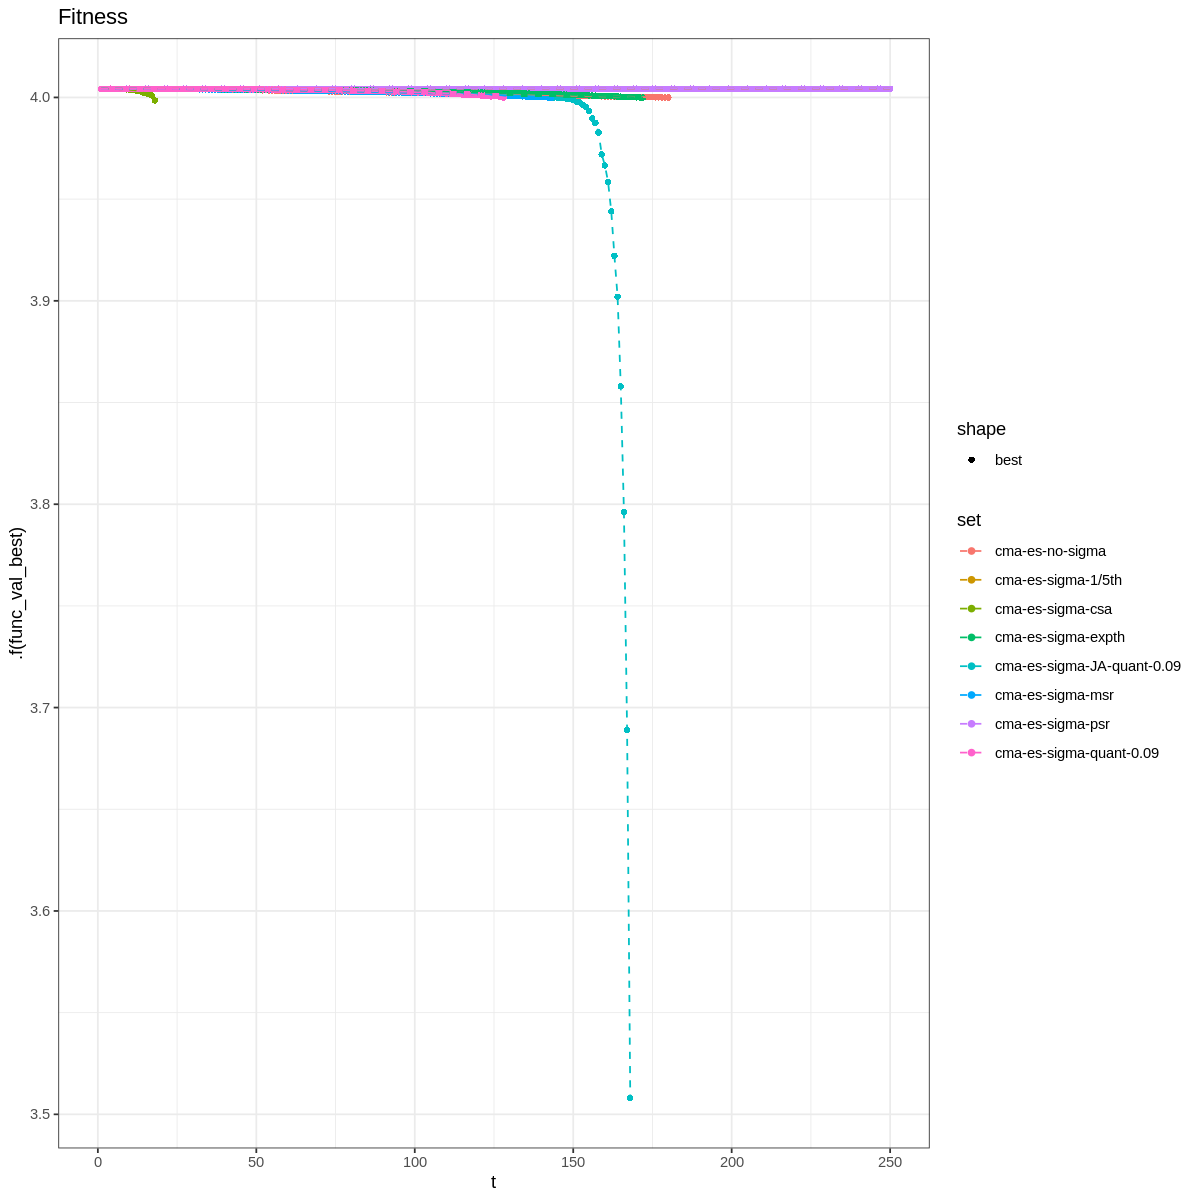

In [41]:
linear_eval50 %>% value_plot()
linear_eval50 %>% mutate(func_val_best = func_val_best + 10000) %>% value_plot(.f=log10) + xlim(0, 250)
#linear_eval50 %>% sigma_plot()

## Krzywe zbieżności -- 100D
### Funkcja gutter $q(x) = x_1 + \sum^{\lambda}_{i = 2}x^{2}_{i}$

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 4726 rows containing missing values (geom_point).”
Warning message:
“Removed 4726 row(s) containing missing values (geom_path).”


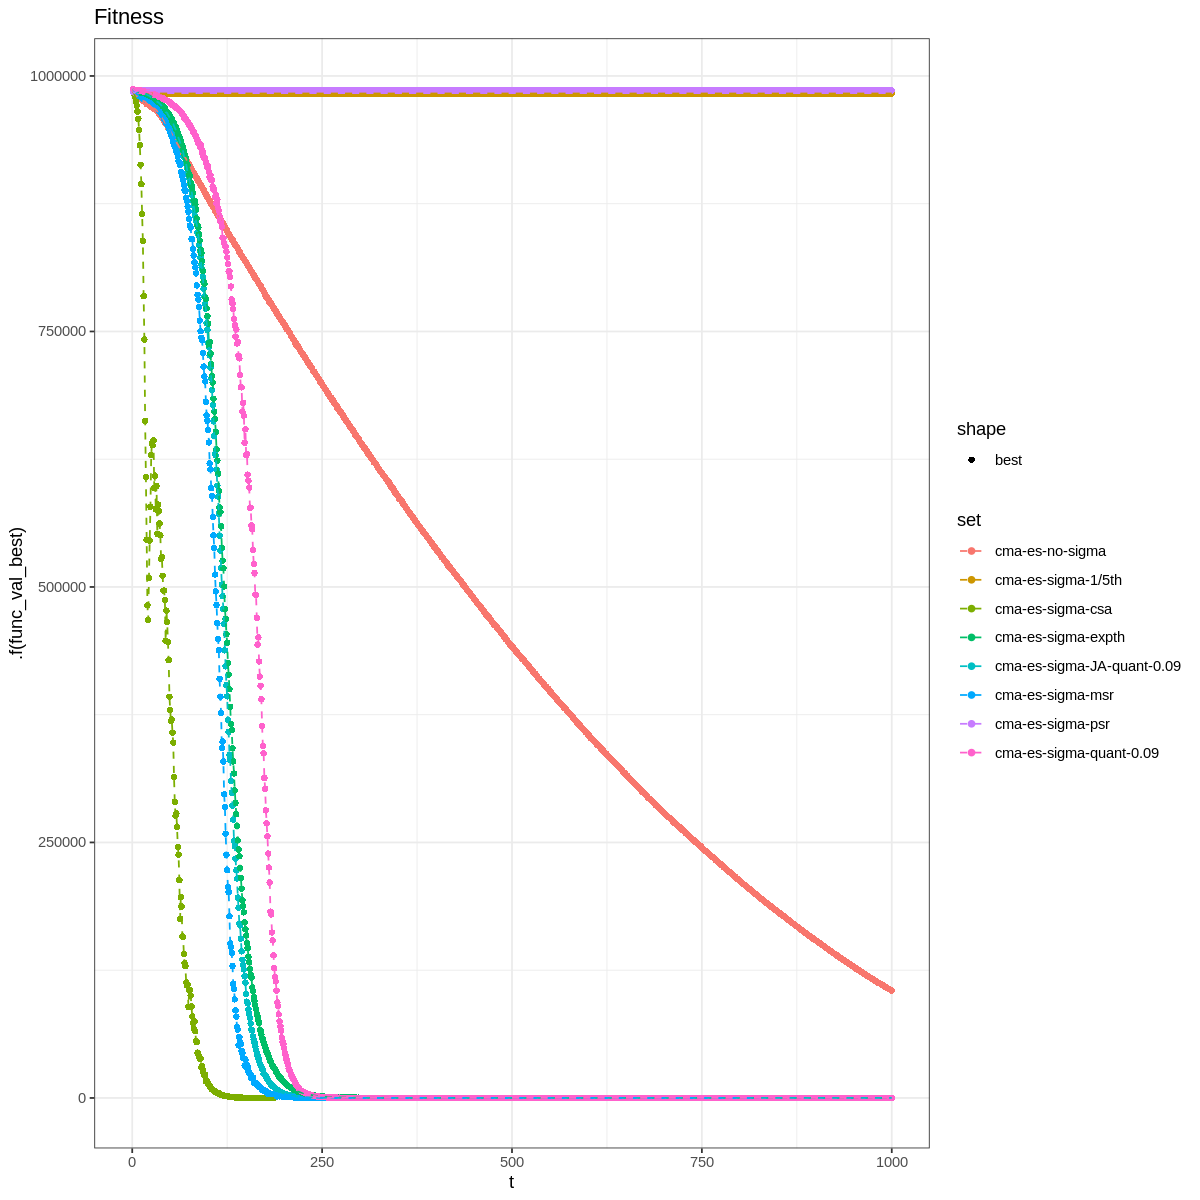

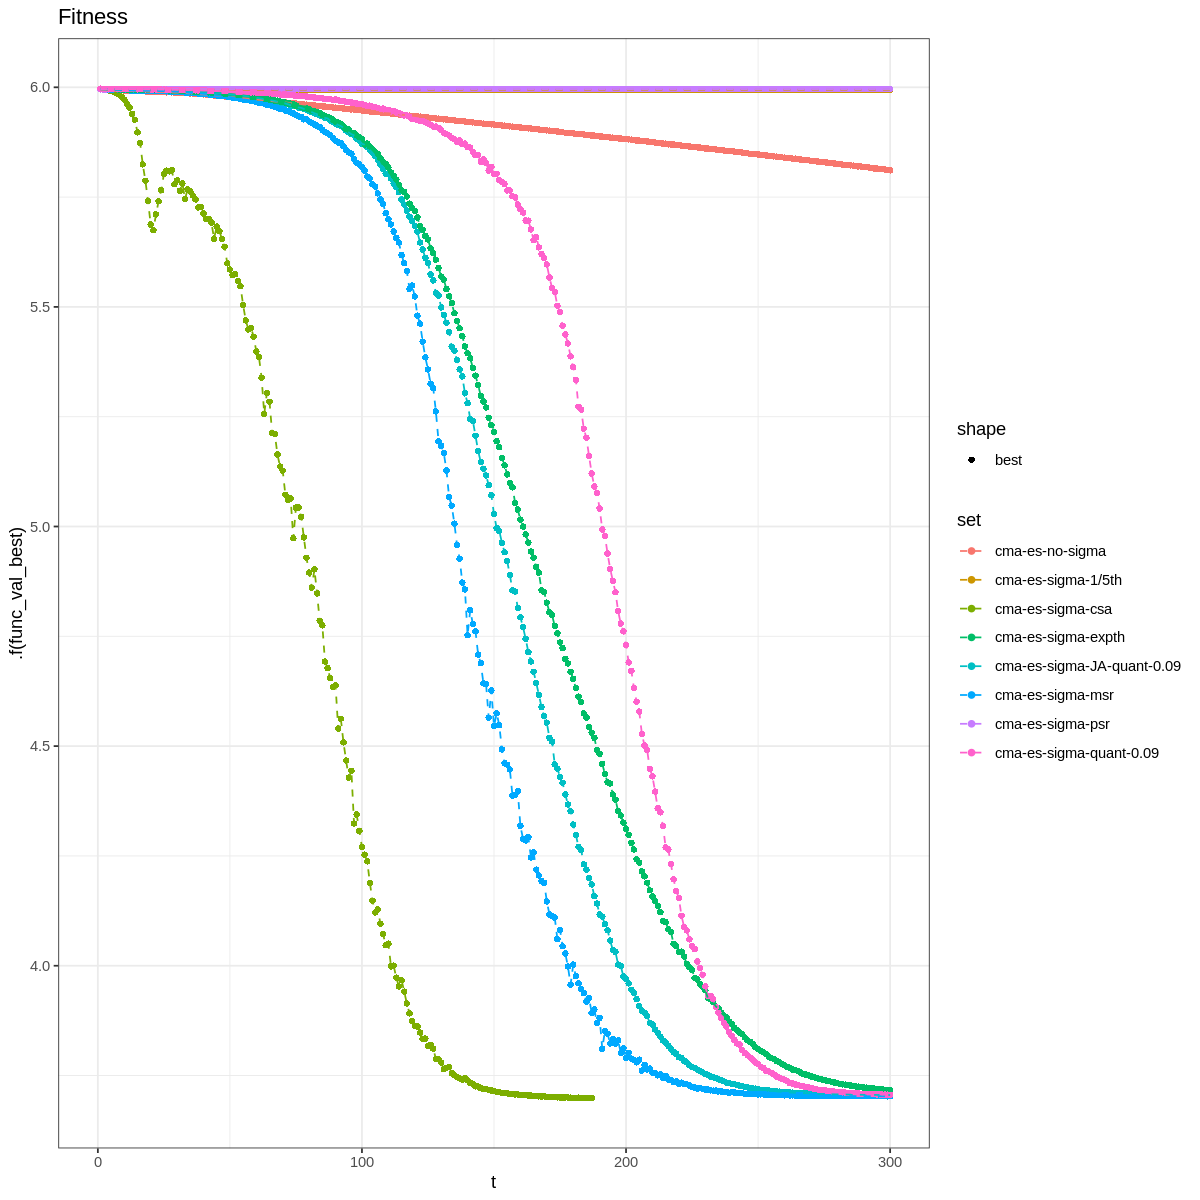

In [38]:
gutter_eval100 %>% value_plot()
gutter_eval100 %>% mutate(func_val_best = func_val_best + 5000) %>% value_plot(.f=log10) + xlim(0, 300)
#gutter_eval100 %>% sigma_plot()


### Funkcja sferyczna $q(x) = x^{T}x$

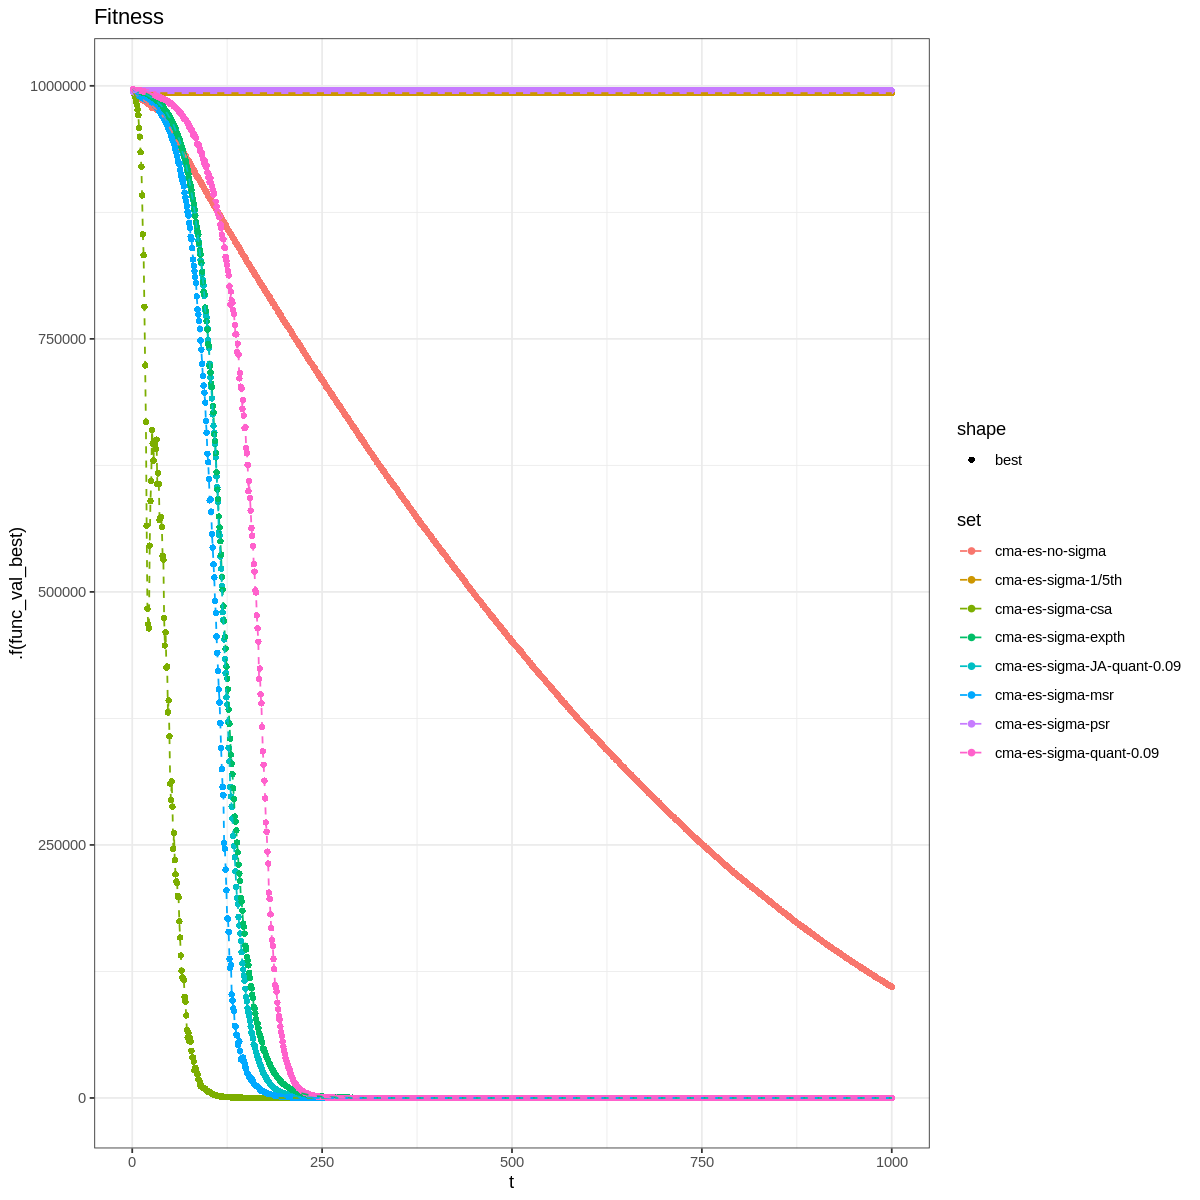

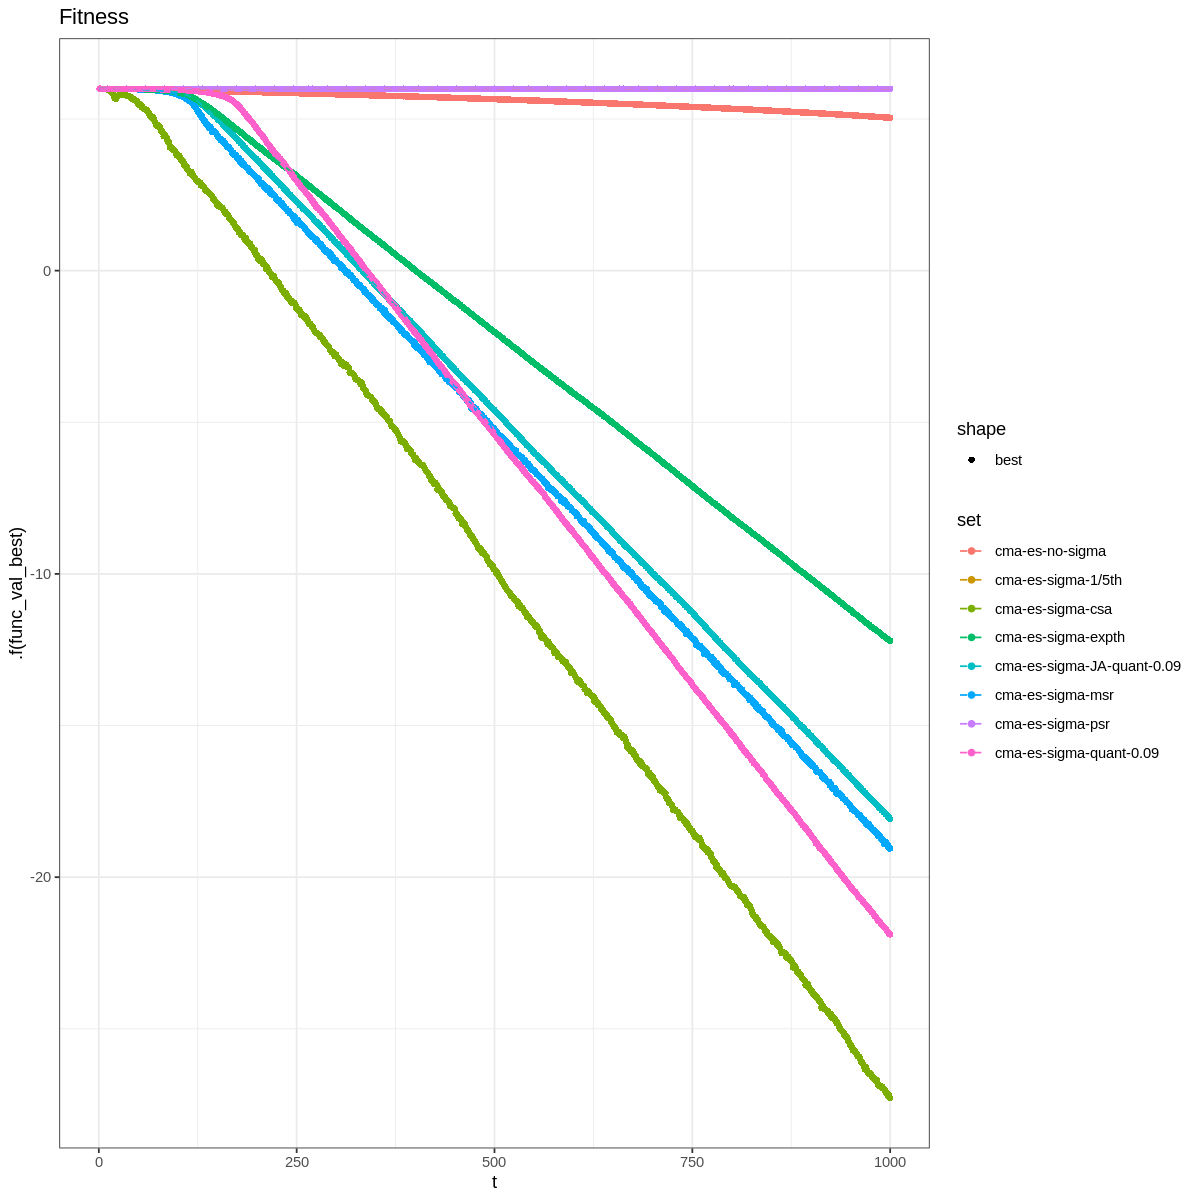

In [39]:
sphere_eval100 %>% value_plot()
sphere_eval100 %>% value_plot(.f=log10)
#sphere_eval100 %>% sigma_plot()

### Funkcja liniowa $q(x) = x_1$

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message:
“Removed 734 rows containing missing values (geom_point).”
Warning message:
“Removed 734 row(s) containing missing values (geom_path).”


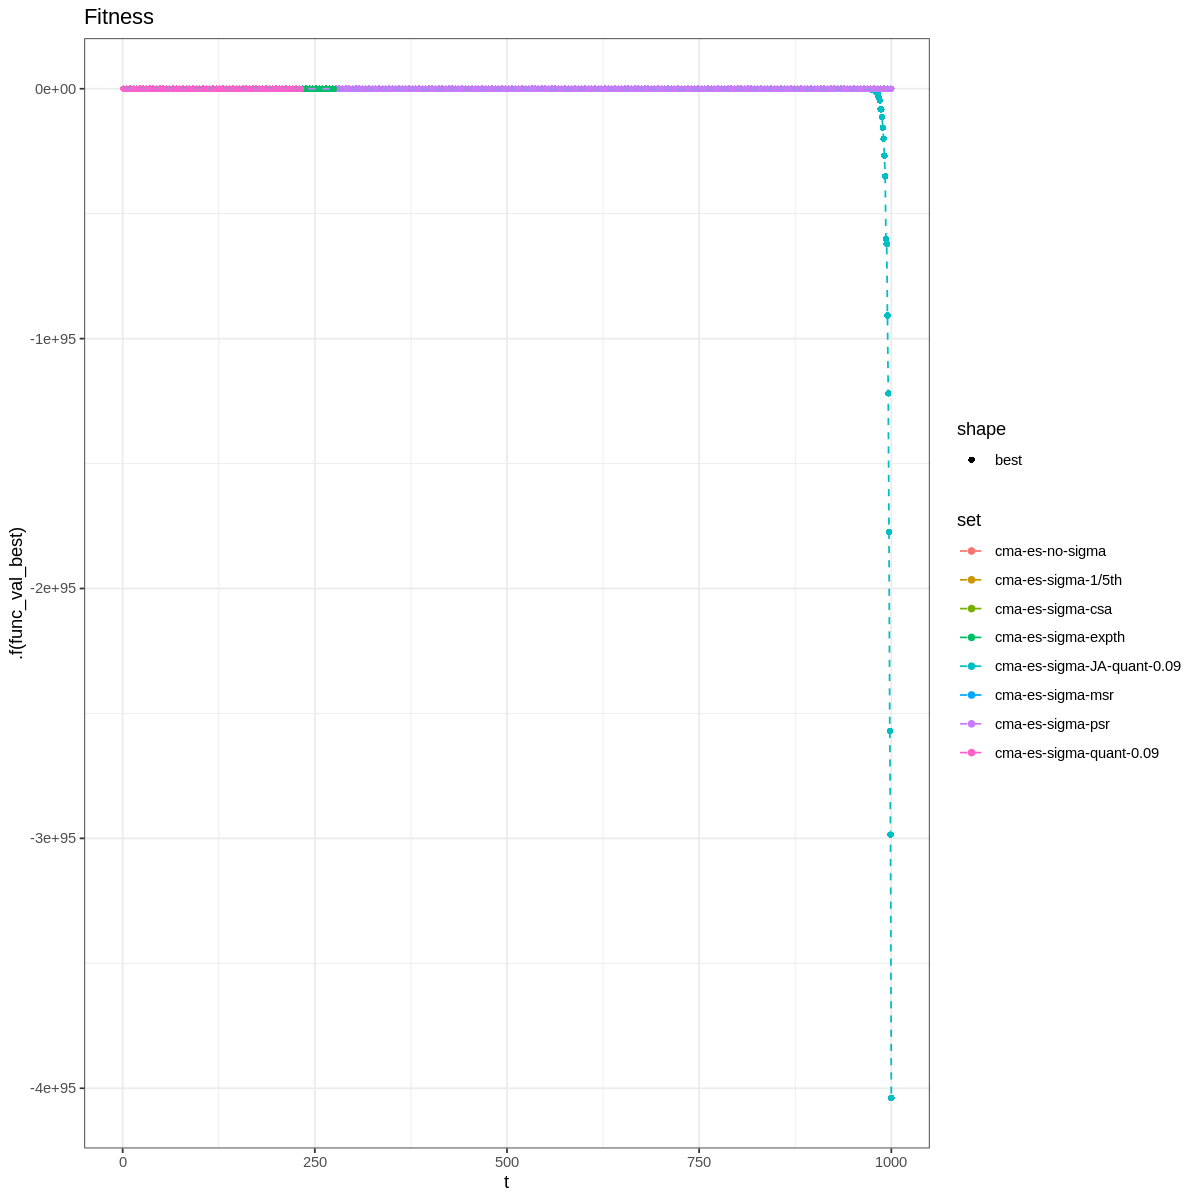

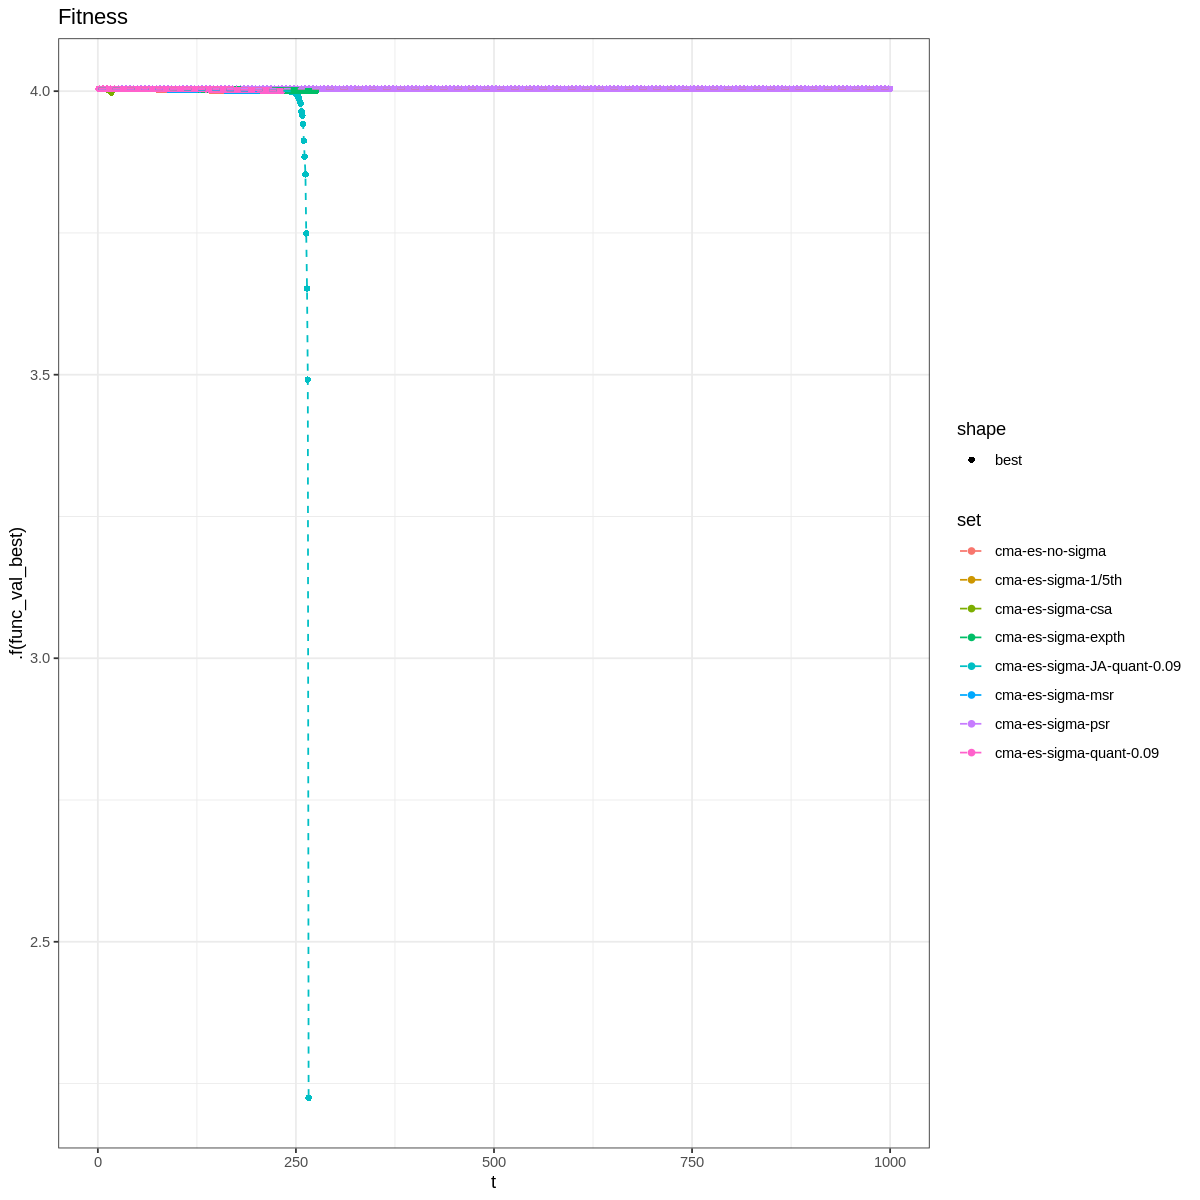

In [40]:
linear_eval100 %>% value_plot()
linear_eval100 %>% mutate(func_val_best = func_val_best + 10000) %>% value_plot(.f=log10) 
#linear_eval100 %>% sigma_plot()